1. [H-Mine Algorithm](#h-mine-algorithm)

#### H-Mine Algorithm:
- it used to find the frequent items in the itemset

- we consider the itemset with their respective transaction as the data for H-Mine algorithm

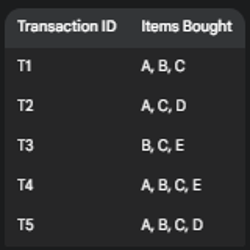

In [2]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/data.png')
new_image = img.resize((250, 250))
display(new_image)

- we set the min support = 2
- at first, we scan for the count of each items in the itemset with all the transactions
    - A => 4
    - B => 4
    - C => 5
    - D => 2
    - E => 2

- now, we construct H-struct:
    - Processing A:
        - transactions with A is chosen and the items followed by the A item in the transaction is captured
            - T1 => B,C
            - T2 => C,D
            - T4 => B,C,E
            - T5 => B,C,D
        - now the substructure will be,
            - {A,B}, {A,C}, {A,D}, {A,E}
    - Processing B:
        - transactions with B is chosen and the items followed by the B item in the transaction is captured
            - T1 => C
            - T3 => C,E
            - T4 => C,E
            - T5 => C,D
        - now the substructure will be,
            - {B,C}, {B,E}, {B,D}
    - Processing C:
        - transactions with C is chosen and the items followed by the C item in the transaction is captured
            - T2 => D
            - T3 => E
            - T4 => E
            - T5 => D
        - now the substructure will be,
            - {C,D}, {C,E}
    - Processing D:
        - transactions with D is chosen and the items followed by the D item in the transaction is captured
            - there are no items in the transaction which appends the D item
    - Processing E:
        - transactions with E is chosen and the items followed by the E item in the transaction is captured
            - there are no items in the transaction which appends the E item

- now we mine the frequent patterns from H-struct
    - we calculate the occurence of sub structure from H-struct in the original transaction and check if it satisfy the threshold
        - For A substructure:
            - {A,B} => 3
            - {A,C} => 4
                - T1, T2, T4, T5
            - {A,D} => 2
            - {A,E} => 1
            - now combine the items that satisfy the min support and continue calculating the occurence
            - {A,B,C} => 3
            - {A,B,D} => 1
            - {A,C,D} => 2
            - now combine the items that satisfy the min support and continue calculating the occurence
                - {A,B,C,D} => 1
            - now we finally say the frequent items are {A,B,C} & {A,C,D}, {A,B}, {A,C}, {A,D}
        - For B substructure:
            - {B,C} => 4
            - {B,E} => 2
            - {B,D} => 1
            - now combine the items that satisfy the min support and continue calculating the occurence
            - {B,C,E} => 2
            - {B,C,D} => 1
            - {B,E,D} => 0
            - now we finally say the frequent items are {B,C,E} & {B,E}, {B,C}
        - For C substructure:
            - {C,D} => 2
            - {C,E} => 2
            - now combine the items that satisfy the min support and continue calculating the occurence
            - {C,D,E} => 0
            - now we finally say the frequent items are {C,D} & {C,E}


Final Frequent item sets:
- {A} (4)
- {B} (3)
- {C} (5)
- {D} (2)
- {E} (2)
- {A, B} (3)
- {A, C} (4)
- {A, D} (2)
- {B, C} (4)
- {B, E} (2)
- {C, E} (2)
- {A, B, C} (3)
- {A, C, D} (2)
- {B, C, E} (2)